## Make necessary imports

In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, linewidth=200, suppress=True)
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.metrics as skm
from sklearn import svm
from sklearn.externals import joblib
import os, time
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

In [3]:
from library.datasets.cifar10 import CIFAR10
from library.utils import file_utils
from library.plot_tools import plot

In [4]:
total_time = 0

## Experiment

In [5]:
exp_no = 1
file_no = 1
one_hot = False
data_source = 'Website'
train_validate_split = 0.2
num_images_required = 1.0
scale_method = 'StandardScaler'

In [6]:
svm_kernel = 'rbf'
svm_gamma = 0.001
svm_c = 100.0
svm_max_iter = 10000
svm_cs =1000

In [7]:
param_name = 'exp_' + str(exp_no).zfill(3) + '_kernel_' + svm_kernel
output_directory = '../logs/cifar10/' + str(file_no).zfill(3) + '_svm_raw/' + 'exp_no_' + str(exp_no).zfill(3) + '/'

## Step 1: Load CIFAR 10 Dataset

In [8]:
start = time.time()
cifar10 = CIFAR10(one_hot_encode=one_hot, num_images=num_images_required,
                  train_validate_split=None, endian='little')
cifar10.load_data(train=True, test=True, data_directory='./datasets/cifar10/')
end = time.time()
print('[ Step 0] Dataset loaded in %5.6f ms' %((end-start)*1000))
print('Dataset size: ' + str(cifar10.train.data.shape))
num_train_images = cifar10.train.data.shape[0]
total_time += (end-start)

Loading CIFAR 10 Dataset
MD5sum of the file: ./datasets/cifar10/cifar-10.tar.gz is verified
Loading 50000 train images
Loading CIFAR 10 Training Dataset
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_1
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_2
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_3
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_4
Reading unpicked data file: ./datasets/cifar10/cifar-10-batches/data_batch_5
Loading 10000 test images
Loading CIFAR 10 Test Dataset
Unpickling test file: ./datasets/cifar10/cifar-10-batches/test_batch
Reading unpicked test file: ./datasets/cifar10/cifar-10-batches/test_batch
Loaded CIFAR 10 Dataset in 2.4803 seconds
[ Step 0] Dataset loaded in 2481.294155 ms
Dataset size: (50000, 3072)


## Step 1.1 Display an image

Plotting CIFAR 10 Train Dataset


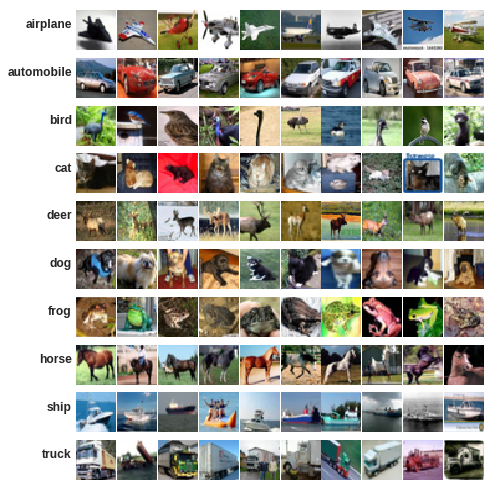

Plotting CIFAR 10 Test Dataset


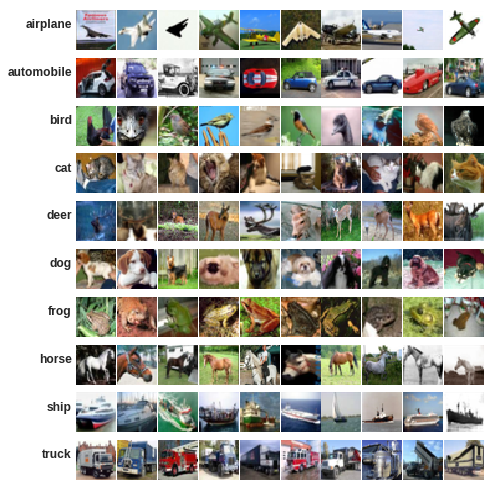

In [9]:
cifar10.plot_sample(plot_data=True, plot_test=True, fig_size=(7, 7))

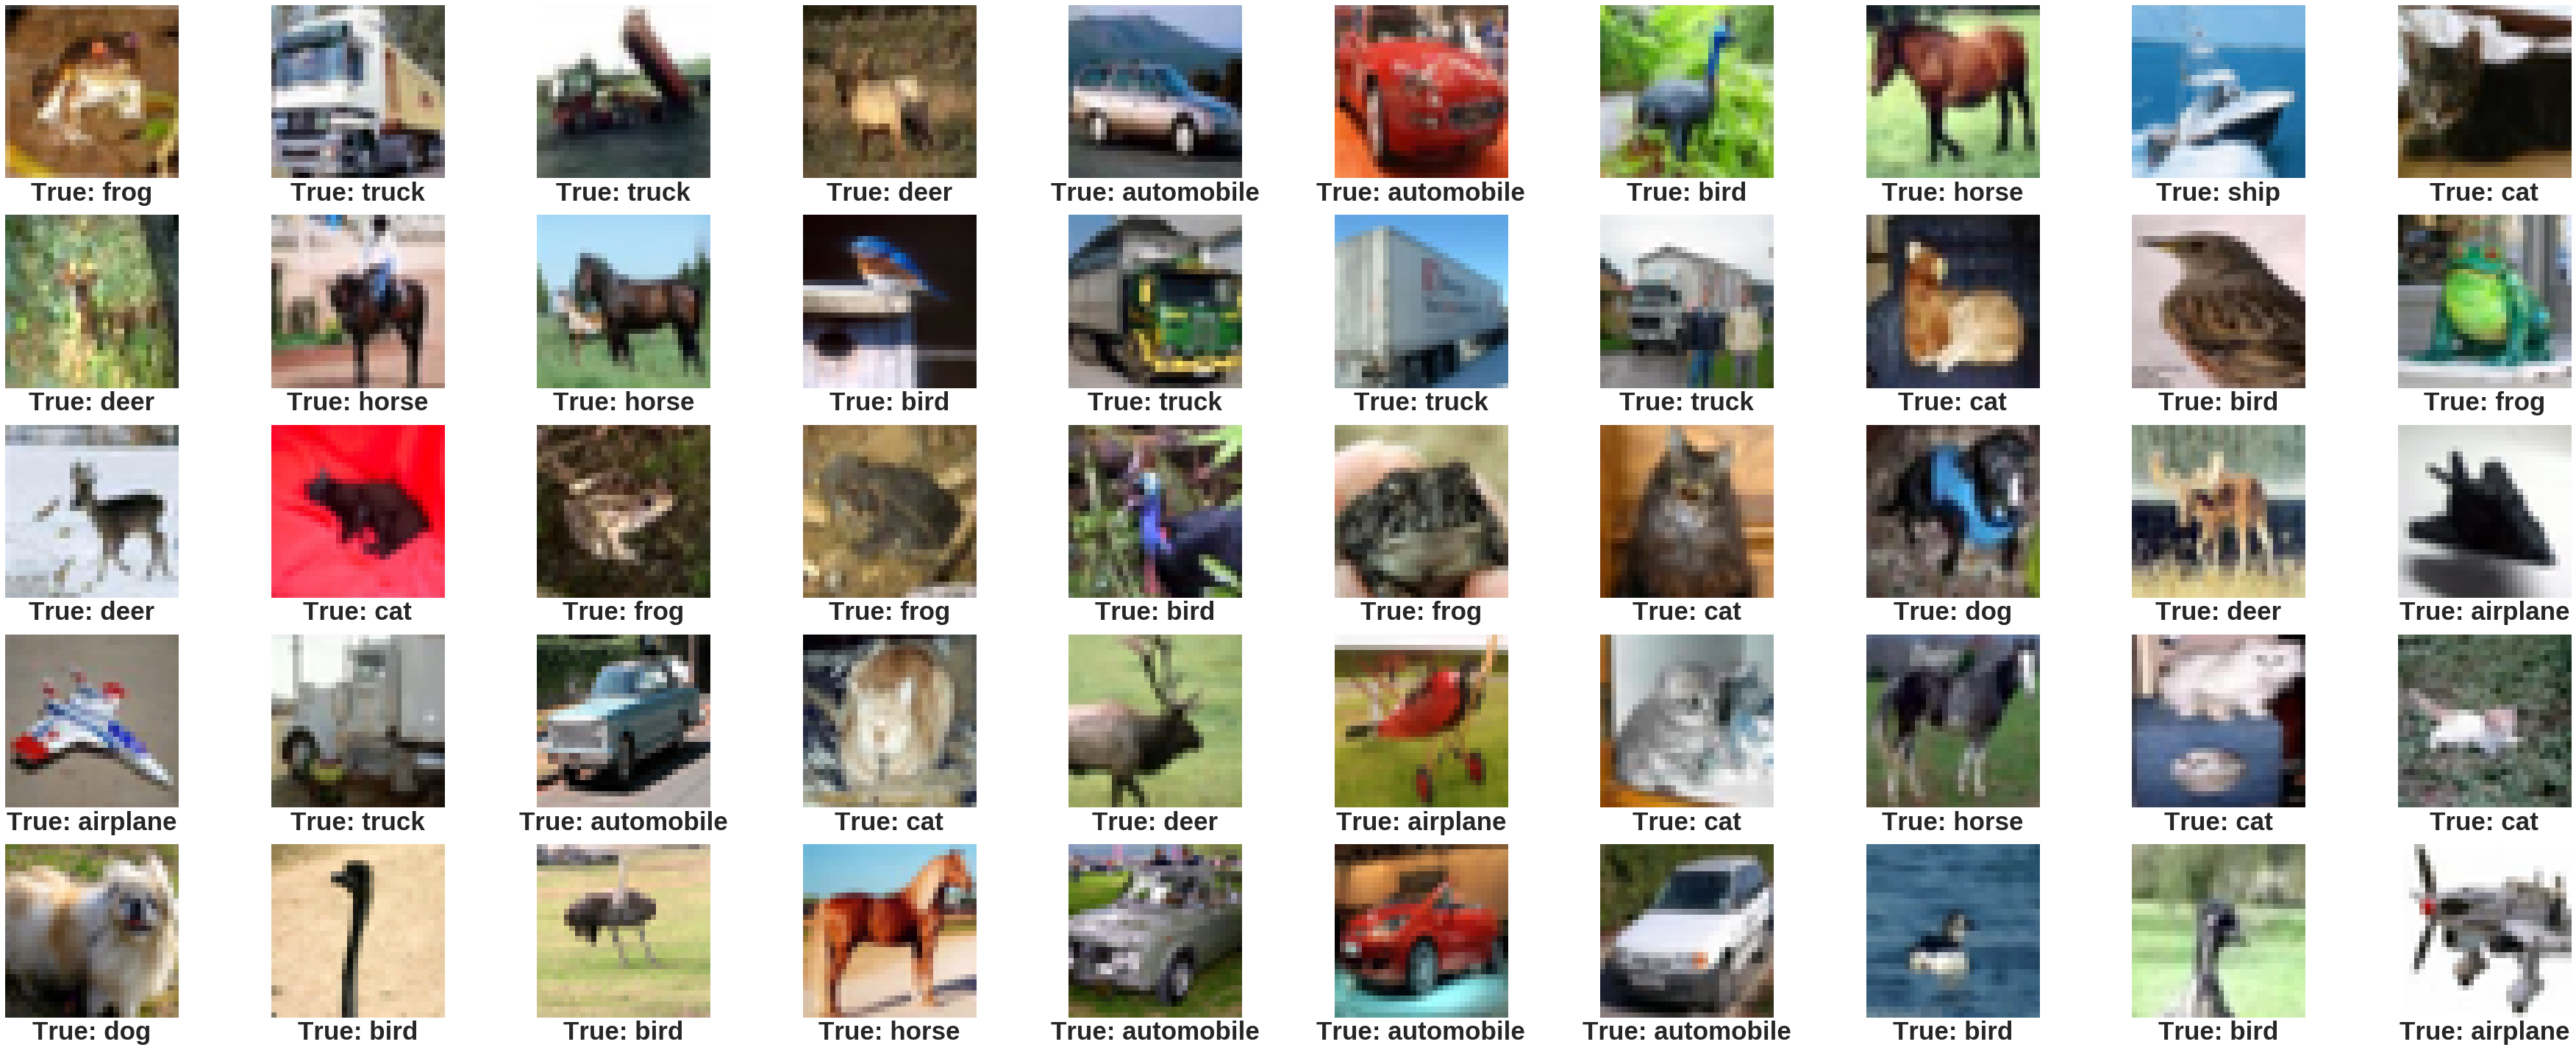

True

In [10]:
cifar10.plot_images(cifar10.train.data[:50, :], cifar10.train.class_names[:50], 
                    nrows=5, ncols=10, fig_size=(20,50), fontsize=35, convert=True)

## Step 2: Preprocess data

In [11]:
start = time.time()
if scale_method == 'StandardScaler':
    ss = StandardScaler()
elif scale_method == 'MinMaxScaler':
    ss = MinMaxScaler()
else:
    ss = StandardScaler()
data_images = ss.fit_transform(cifar10.train.data)
test_images = ss.fit_transform(cifar10.test.data)
end = time.time()
print('[ Step 2] Dataset transformations done in %.6f ms' %((end-start)*1000))
print('Training the classifier on %d images' % num_train_images)
print('Dataset size: ' + str(cifar10.train.data.shape))
total_time += (end-start)

/net/voxel03/misc/me/praneethas/Softwares/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


[ Step 2] Dataset transformations done in 2677.190304 ms
Training the classifier on 50000 images
Dataset size: (50000, 3072)


## Step 3: Train Test Split of data

In [12]:
start = time.time()
X_train, X_test, y_train, y_test = train_test_split(data_images, cifar10.train.class_labels, 
                                                    test_size=train_validate_split)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print('Train set shape         : ' + str(X_train.shape))
print('Train labels shape      : ' + str(y_train.shape))
print('Validation set shape    : ' + str(X_test.shape))
print('Validation labels shape : ' + str(y_test.shape))
end = time.time()
print('[ Step 3] Train-test split done in %.6f ms' %((end-start)*1000))
total_time += (end-start)

Train set shape         : (40000, 3072)
Train labels shape      : (40000,)
Validation set shape    : (10000, 3072)
Validation labels shape : (10000,)
[ Step 3] Train-test split done in 1344.720602 ms


## Step 4: Initiate Support Vector Classifier

In [13]:
start = time.time()
clf = svm.SVC(kernel=svm_kernel, C=svm_c, verbose=True, max_iter=svm_max_iter, cache_size=svm_cs, gamma=svm_gamma)
print(clf)
end = time.time()
print('[ Step 4] Made the SVM classifier in %.6f ms' %((end-start)*1000))
total_time += (end-start)

SVC(C=100.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)
[ Step 4] Made the SVM classifier in 0.648022 ms


## Step 5: Generate the SVC Model using the train data

In [14]:
start = time.time()
print(X_train.shape)
print(y_train.shape)
clf.fit(X_train, y_train)
end = time.time()
print('[ Step 5] Made the model in %.6f ms' %((end-start)*1000))
total_time += (end-start)

(40000, 3072)
(40000,)
[LibSVM][ Step 5] Made the model in 9371795.745611 ms


/net/voxel03/misc/me/praneethas/Softwares/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


## Step 6: Write the obtained model to file for further use

In [15]:
start = time.time()
file_utils.mkdir_p(output_directory)
model_output_path = output_directory + '01_' + param_name + '.pkl'
joblib.dump(clf, model_output_path)
end = time.time()
print('[ Step 6] Write obtained model to %s in %.6f ms' %(model_output_path, ((end-start)*1000)))
total_time += (end-start)

[ Step 6] Write obtained model to ../logs/cifar10/001_svm_raw/exp_no_001/01_exp_001_kernel_rbf.pkl in 16980.743170 ms


## Step 7: Do the prediction on validation set

Labels  : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Classes : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Confusion matrix, without normalization
[[547  67  53  26  23  22  16  27 123  87]
 [ 26 683  10  24   6  14  12  18  39 150]
 [ 67  32 399 104 122  83  76  54  22  43]
 [ 36  57  57 407  42 168  85  36  24  76]
 [ 56  31 161  98 450  54  60  74  32  34]
 [ 25  25  71 192  41 449  52  55  11  42]
 [ 15  30  92 117  73  76 521  21   7  28]
 [ 41  36  44  70  62  82  19 607  13  82]
 [ 75  78  17  39  16  26   8  11 654  72]
 [ 32 139   6  39   8  26  13  31  44 654]]
Normalized confusion matrix
[[ 0.552  0.068  0.053  0.026  0.023  0.022  0.016  0.027  0.124  0.088]
 [ 0.026  0.696  0.01   0.024  0.006  0.014  0.012  0.018  0.04   0.153]
 [ 0.067  0.032  0.398  0.104  0.122  0.083  0.076  0.054  0.022  0.043]
 [ 0.036  0.058  0.058  0.412  0.043  0.17   0.086  0.036  0.024  0.077]
 [ 0.053  0.03   0.153  0.093  0.429  0.051  0.057  0.07   0.03   0

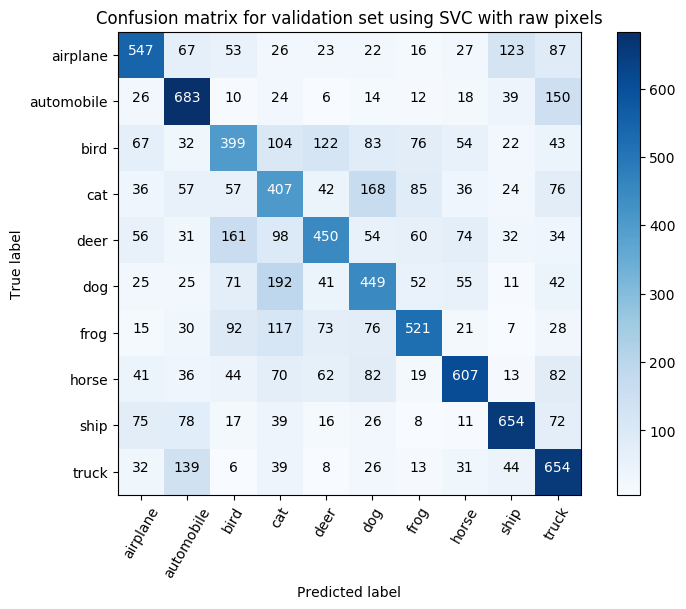

[ Step 7] Make prediction on validation dataset in 1469908.351421 ms


In [16]:
y_predict = clf.predict(X_test)
labels = sorted(list(set(cifar10.train.class_labels)))
print('Labels  : ' + str(labels))
print('Classes : ' + str(cifar10.classes))
plot.plot_confusion_matrix(y_test, y_predict, classes=cifar10.classes, fig_size=(8,6),
                           normalize=True, title='Confusion matrix for validation set using SVC with raw pixels')
end = time.time()
print('[ Step 7] Make prediction on validation dataset in %.6f ms' %((end-start)*1000))
total_time += (end-start)

## Step 8: Generate the Classification report

In [17]:
start = time.time()
print('Classification report:')
print(skm.classification_report(y_test, y_predict, target_names=cifar10.classes))
validate_accuracy = skm.accuracy_score(y_test, y_predict, normalize=True)
print('Validation accuracy score: ' + str(validate_accuracy))
end = time.time()
print('[ Step 8] Generating classification on validation dataset in %.6f ms' %((end-start)*1000))
total_time += (end-start)

Classification report:
             precision    recall  f1-score   support

   airplane       0.59      0.55      0.57       991
 automobile       0.58      0.70      0.63       982
       bird       0.44      0.40      0.42      1002
        cat       0.36      0.41      0.39       988
       deer       0.53      0.43      0.48      1050
        dog       0.45      0.47      0.46       963
       frog       0.60      0.53      0.57       980
      horse       0.65      0.57      0.61      1056
       ship       0.67      0.66      0.67       996
      truck       0.52      0.66      0.58       992

avg / total       0.54      0.54      0.54     10000

Validation accuracy score: 0.5371
[ Step 8] Generating classification on validation dataset in 12.578011 ms


## Step 9: Generate the predictions on test data set

In [18]:
start = time.time()
prediction_numbers = clf.predict(test_images)
prediction_classes = []
num_test_images = test_images.shape[0]
for i in range(num_test_images):
    prediction_classes.append(cifar10.classes[int(prediction_numbers[i])])
end = time.time()
print('[ Step 9] Make prediction on test dataset in %.6f ms' %((end-start)*1000))
total_time += (end-start)

[ Step 9] Make prediction on test dataset in 1442932.368279 ms


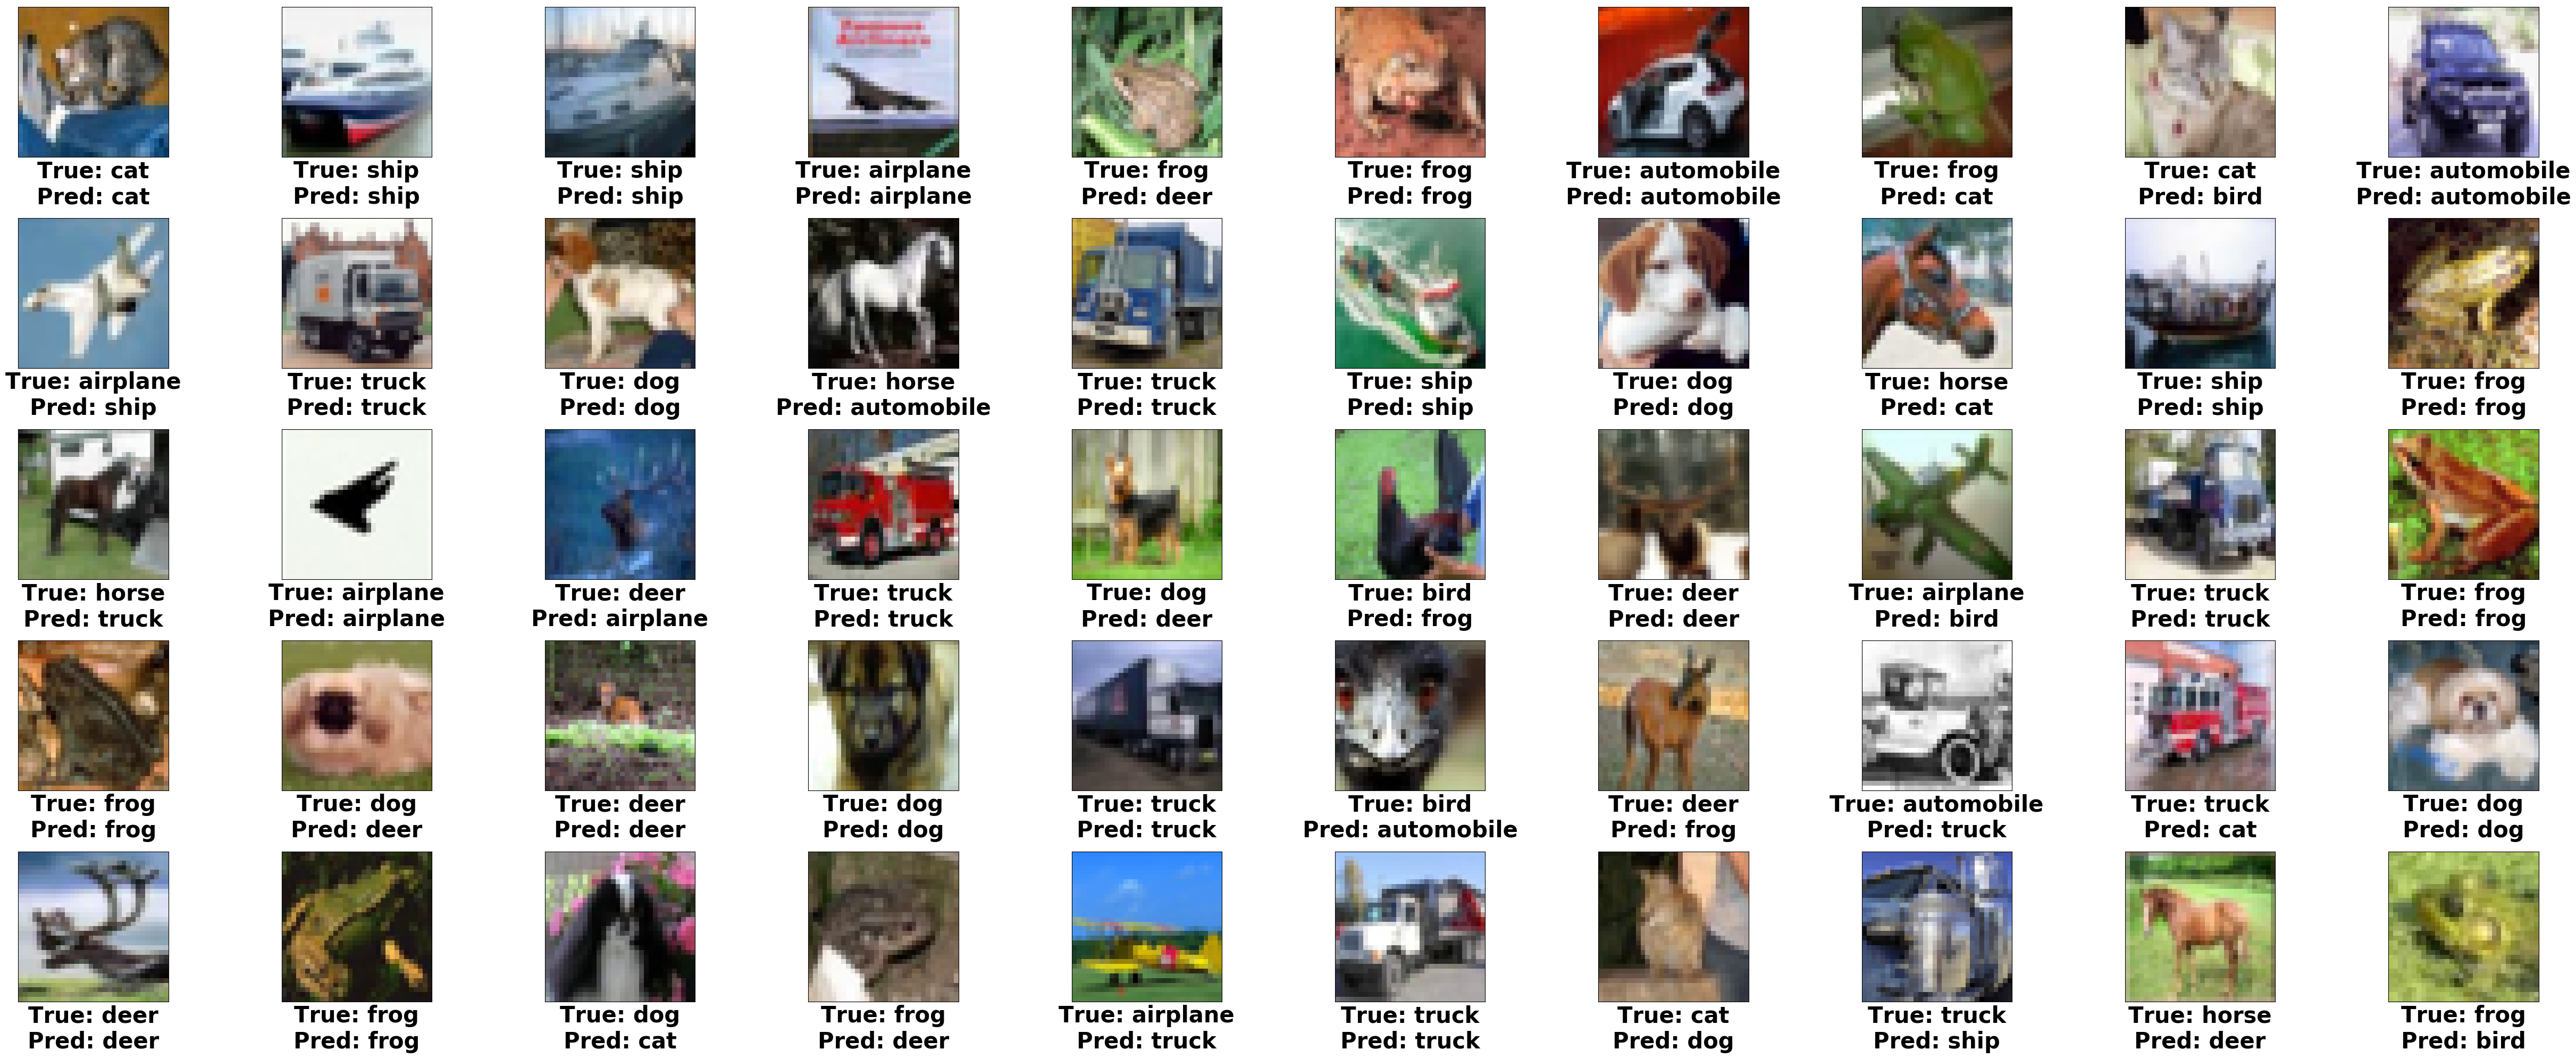

True

In [19]:
cifar10.plot_images(cifar10.test.data[:50], cifar10.test.class_names[:50], cls_pred=prediction_classes[:50], 
                    nrows=5, ncols=10, fig_size=(20,50), fontsize=30, convert=True)

## Step 10: Print the accuracy score of the classifier

Confusion matrix, without normalization
[[582  47  61  15  19  15  22  24 118  97]
 [ 25 685  11  39   8  21   9  14  37 151]
 [ 75  34 422 104 108  83  73  48  19  34]
 [ 25  41  76 410  46 180  91  36  18  77]
 [ 49  20 151  83 453  50  81  68  25  20]
 [ 21  20  55 217  53 469  53  57  16  39]
 [  9  31  87 108  76  61 566  22  11  29]
 [ 29  34  38  85  57  77  17 542  11 110]
 [ 88  86  10  41  13  21  11  12 646  72]
 [ 28 158   7  42   7  22  14  26  43 653]]
Normalized confusion matrix
[[ 0.582  0.047  0.061  0.015  0.019  0.015  0.022  0.024  0.118  0.097]
 [ 0.025  0.685  0.011  0.039  0.008  0.021  0.009  0.014  0.037  0.151]
 [ 0.075  0.034  0.422  0.104  0.108  0.083  0.073  0.048  0.019  0.034]
 [ 0.025  0.041  0.076  0.41   0.046  0.18   0.091  0.036  0.018  0.077]
 [ 0.049  0.02   0.151  0.083  0.453  0.05   0.081  0.068  0.025  0.02 ]
 [ 0.021  0.02   0.055  0.217  0.053  0.469  0.053  0.057  0.016  0.039]
 [ 0.009  0.031  0.087  0.108  0.076  0.061  0.566  0.022  0.01

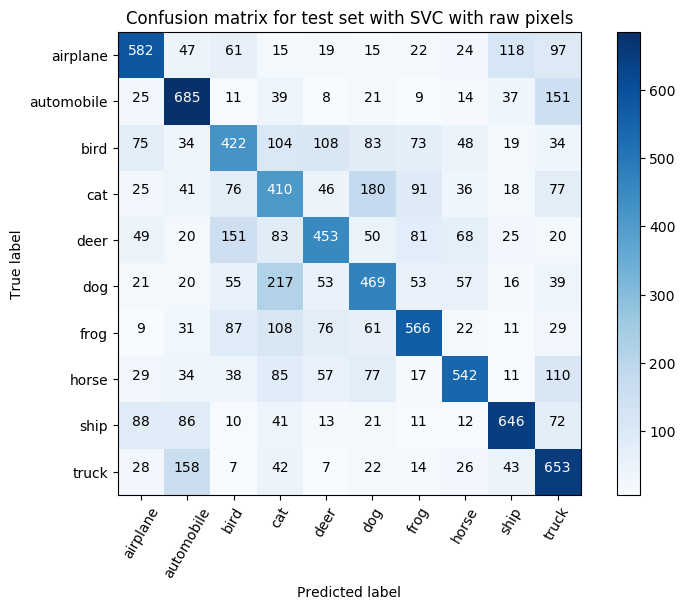

             precision    recall  f1-score   support

   airplane       0.63      0.58      0.60      1000
 automobile       0.59      0.69      0.64      1000
       bird       0.46      0.42      0.44      1000
        cat       0.36      0.41      0.38      1000
       deer       0.54      0.45      0.49      1000
        dog       0.47      0.47      0.47      1000
       frog       0.60      0.57      0.58      1000
      horse       0.64      0.54      0.59      1000
       ship       0.68      0.65      0.66      1000
      truck       0.51      0.65      0.57      1000

avg / total       0.55      0.54      0.54     10000

Accuracy score on test data: 0.5428


In [ ]:
start = time.time()
plot.plot_confusion_matrix(cifar10.test.class_labels, prediction_numbers, classes=cifar10.classes,
                           normalize=True, title='Confusion matrix for test set with SVC with raw pixels')
print(skm.classification_report(cifar10.test.class_labels, prediction_numbers, target_names=cifar10.classes))
test_accuracy = skm.accuracy_score(cifar10.test.class_labels, prediction_numbers, normalize=True)
print('Accuracy score on test data: ' + str(test_accuracy))
end = time.time()
total_time += (end-start)

In [ ]:
start = time.time()
print('Prediction done on %d images' %cifar10.test.data.shape[0])
print('Accuracy of the classifier: %.4f' %clf.score(test_images, cifar10.test.class_labels))
end = time.time()
total_time += (end-start)

Prediction done on 10000 images


## Step 11: Write the predictions to CSV file

In [ ]:
start = time.time()
indices = np.arange(1, cifar10.test.data.shape[0]+1)
predictions = np.column_stack((indices, prediction_classes))
file_utils.mkdir_p(output_directory)
output_csv_file = output_directory + '01_' + param_name + '.csv'
column_names = ['id', 'label']
predict_test_df = pd.DataFrame(data=predictions, columns=column_names)
predict_test_df.to_csv(output_csv_file, index=False)
end = time.time()
print('[ Step 11] Writing the test data to file: %s in %.6f ms' %(output_csv_file, (end-start)*1000))
total_time += (end-start)

In [ ]:
print('Code took %.6f s to run on training with %d examples' % (total_time,num_train_images))

## Print the parameters for record

In [ ]:
print('| %d | ' %exp_no, end='')
print('%d | '%num_train_images, end='')
print('Kernel = %s, C = %.2f, Max. Iterations: %d, Cache size = %d, Random State: 1 | ' 
      %(svm_kernel, svm_c, svm_max_iter, svm_cs), end='')
print('[Link](%s) | ' %output_csv_file, end='')
print('%.4f | ' %validate_accuracy, end='')
print('%.4f | ' %test_accuracy, end='')
print('%s | ' %data_source, end='')
print('[Link](%s) |' %model_output_path)

## Step 12: Write the notebook to HTML file

In [ ]:
def output_HTML(read_file, output_file):
    from nbconvert import HTMLExporter
    import codecs
    import nbformat
    exporter = HTMLExporter()
    output_notebook = nbformat.read(read_file, as_version=4)
    print()
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

In [ ]:
%%javascript
var notebook = IPython.notebook
notebook.save_notebook()

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

In [ ]:
current_file = './' + theNotebook + '.ipynb'
output_file = output_directory + str(file_no).zfill(3) + '_exp_no_' + str(exp_no).zfill(3) + '_' + theNotebook + '.html'
print('Current file: ' + str(current_file))
print('Output file: ' + str(output_file))
file_utils.mkdir_p(output_directory) 
output_HTML(current_file, output_file)

In [ ]:
print('Code took %.6f s to run on training with %d examples' % (total_time,num_train_images))